In [50]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


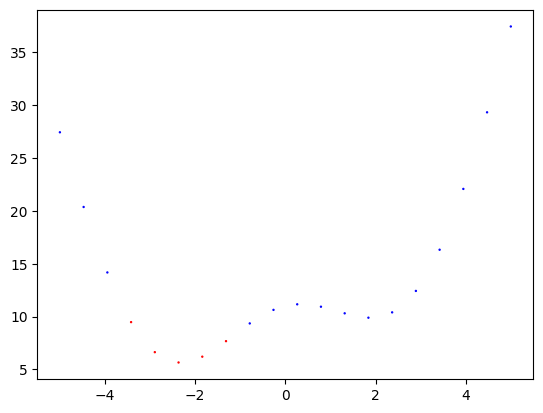

In [54]:

x = np.linspace(-5, 5, 20)
y = x ** 2 + x + 5 * np.cos(x) + 6

colors = ['red' if i in [3, 4, 5, 6, 7] else 'blue' for i in range(len(x))]

fig, ax = plt.subplots()

ax.scatter(x, y, c = colors, s = 0.5)


In [ ]:
for i in [2, 4]:
    dx_ = x[i+1] - x[i]
    dx.append(dx_)
    dy_ = y[i+1] - y[i]
    dy.append(dy_)
    # ax.arrow(x[i], y[i], dx_, dy_, color='red', head_width=0.2)

def compute_intersection(x1, y1, dx1, dy1, x2, y2, dx2, dy2):
    # Compute t1 and t2
    t1 = (x2 - x1 + dx2 * (y1 - y2) / dy2) / (dx1 - dx2 * dy1 / dy2)
    t2 = (y1 - y2 + t1 * dy1) / dy2
    
    # Compute the intersection point
    intersection_x = x1 + t1 * dx1
    intersection_y = y1 + t1 * dy1
    
    return intersection_x, intersection_y

inter = compute_intersection(x[2], y[2], dx[0], dy[0], x[4], y[4], dx[1], dy[1])
plt.scatter(inter[0], inter[1], c = 'green', s = 0.5)
